In [75]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import glob
from PIL import Image

(300, 200, 4)


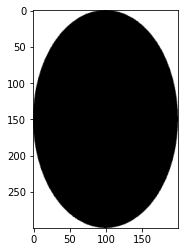

(200, 200, 4)


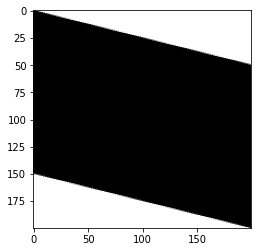

(200, 200, 4)


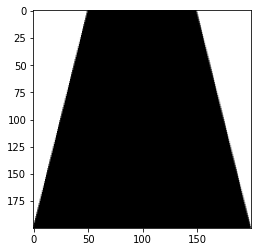

(300, 200, 4)


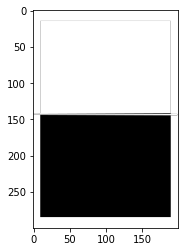

(200, 200, 4)


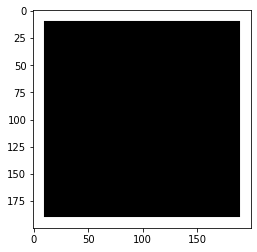

(200, 200, 4)


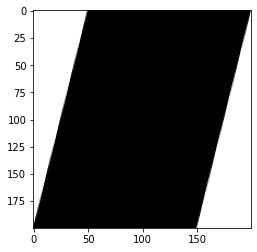

(200, 200, 4)


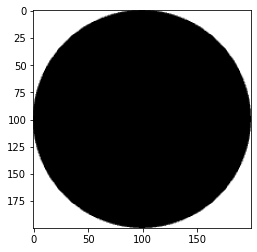

(200, 200, 4)


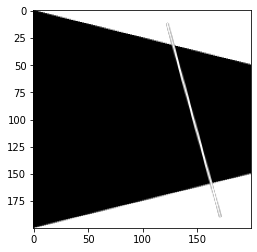

(200, 300, 4)


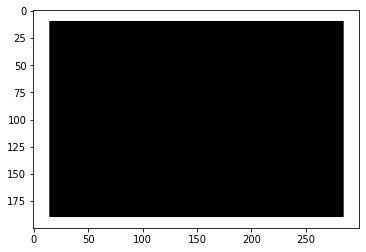

(200, 300, 4)


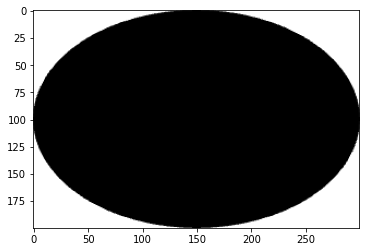

In [79]:
path = './Person//1xShapes/*'
arr = []
for p in glob.glob(path):
#     img=cv2.imread(p,cv2.IMREAD_UNCHANGED)
    img = Image.open(p)
    print(np.asarray(img).shape)
    arr.append(np.asarray(img))
    plt.imshow(img,cmap='gray')
    plt.show()
#     break

In [80]:
from PIL import Image

def calculate_black_to_white_ratio(image_path):
    try:
        # Load the image
        image = Image.open(image_path)

        # Convert the image to RGBA mode to include alpha (transparency) channel
        image = image.convert("RGBA")

        # Get pixel data
        pixels = list(image.getdata())

        # Count black (0) and white (255) pixels while excluding transparent pixels
        black_pixels = 0
        white_pixels = 0

        for pixel in pixels:
            r, g, b, a = pixel
            if a > 0:  # Exclude transparent pixels
                if r == 0 and g == 0 and b == 0:
                    black_pixels += 1
                elif r == 255 and g == 255 and b == 255:
                    white_pixels += 1

        # Calculate the ratio
        if white_pixels == 0:
            ratio = 0  # To avoid division by zero
        else:
            ratio = max(black_pixels / white_pixels, white_pixels/black_pixels )

        return black_pixels, white_pixels, ratio

    except Exception as e:
        return None




In [81]:
final= []
path = './Person/1xShapes/*'
for p in glob.glob(path):
    result = calculate_black_to_white_ratio(p)

    if result:
        black_pixels, white_pixels, ratio = result
        res = {'Path':p,'Black':black_pixels,'White':white_pixels,'Ratio':ratio}
        final.append(res)
        print(p)
        print(f"Black Pixels: {black_pixels}")
        print(f"White Pixels: {white_pixels}")
        print(f"Black to White Ratio: {ratio:.2f}")
        print()
    else:
        print("Error loading the image or calculating the ratio.")

./Person/1xShapes/ellipse_angle_90.png
Black Pixels: 47316
White Pixels: 0
Black to White Ratio: 0.00

./Person/1xShapes/parallelogram_angle_90.png
Black Pixels: 30100
White Pixels: 0
Black to White Ratio: 0.00

./Person/1xShapes/trapezium_angle_0.png
Black Pixels: 30150
White Pixels: 0
Black to White Ratio: 0.00

./Person/1xShapes/rectangle_angle_90.png
Black Pixels: 25200
White Pixels: 23070
Black to White Ratio: 1.09

./Person/1xShapes/square.png
Black Pixels: 32400
White Pixels: 0
Black to White Ratio: 0.00

./Person/1xShapes/parallelogram_angle_0.png
Black Pixels: 30100
White Pixels: 0
Black to White Ratio: 0.00

./Person/1xShapes/circle.png
Black Pixels: 31576
White Pixels: 0
Black to White Ratio: 0.00

./Person/1xShapes/trapezium_angle_90.png
Black Pixels: 29732
White Pixels: 154
Black to White Ratio: 193.06

./Person/1xShapes/rectangle_angle_0.png
Black Pixels: 48600
White Pixels: 0
Black to White Ratio: 0.00

./Person/1xShapes/ellipse_angle_0.png
Black Pixels: 47316
White Pixe

In [82]:
import pandas as pd
pd.DataFrame(final)

,Path,Black,White,Ratio
0,./Person/1xShapes/ellipse_angle_90.png,47316,0,0.000000
1,./Person/1xShapes/parallelogram_angle_90.png,30100,0,0.000000
2,./Person/1xShapes/trapezium_angle_0.png,30150,0,0.000000
3,./Person/1xShapes/rectangle_angle_90.png,25200,23070,1.092328
4,./Person/1xShapes/square.png,32400,0,0.000000
5,./Person/1xShapes/parallelogram_angle_0.png,30100,0,0.000000
6,./Person/1xShapes/circle.png,31576,0,0.000000
7,./Person/1xShapes/trapezium_angle_90.png,29732,154,193.064935
8,./Person/1xShapes/rectangle_angle_0.png,48600,0,0.000000
9,./Person/1xShapes/ellipse_angle_0.png,47316,0,0.000000
